BP :

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
#Importing data set
data = pd.read_csv("startup.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#Retaining original data set 
df = data.copy()
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Changing column name and type to numeric

df = df.rename({'R&D Spend' : 'RDSpend'},axis=1)
df = df.rename({'Marketing Spend' : 'MSpend'},axis=1)
df["State"] = df['State'].astype("category")

In [6]:
# Encoding of catagorical data - label encoder
values = df['State']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
df['state'] = integer_encoded
df = df.drop(['State'],axis=1)

In [7]:
# Validationg assumptions of MLR
#Correlation matrix
corr = df.corr()
corr

,RDSpend,Administration,MSpend,Profit,state
RDSpend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
MSpend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
state,0.104685,0.011847,0.077670,0.101796,1.000000


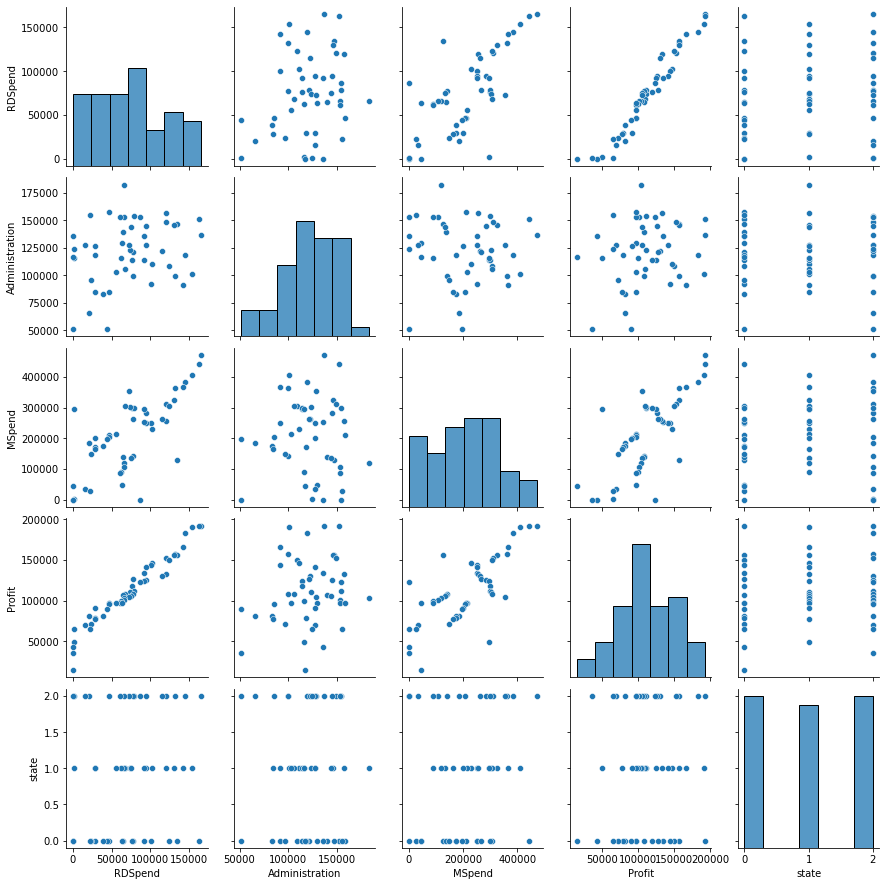

In [8]:
# Ploting correlation
sns.pairplot(df)

 Model Building

In [9]:
model = smf.ols('Profit~RDSpend+Administration+MSpend+state',data=df).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 21 May 2021   Prob (F-statistic):           8.51e-29
Time:                        12:52:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RDSpend            0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
MSpend             0.0272      0.017      1.637      0.109      -0.006       0.061
state            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation

simple linear regression model for administration,Mspend,state

In [11]:
ml_r=smf.ols('Profit~RDSpend',data = df).fit() 

In [12]:
# Simple linaer regression model for Profit and administration
ml_a=smf.ols('Profit~Administration',data = df).fit() 
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 21 May 2021   Prob (F-statistic):              0.162
Time:                        12:52:37   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Simple linaer regression model for Profit and mspend
ml_m=smf.ols('Profit~MSpend',data = df).fit() 
ml_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 21 May 2021   Prob (F-statistic):           4.38e-10
Time:                        12:52:38   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MSpend         0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Simple linaer regression model for Profit and state
ml_s=smf.ols('Profit~state',data = df).fit() 
ml_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Fri, 21 May 2021   Prob (F-statistic):              0.482
Time:                        12:52:38   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
state       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Checking for multicollinearity (VIF)


In [15]:
rsq_rds = smf.ols('RDSpend~Administration+MSpend+state+Profit',data=df).fit().rsquared  
vif_rds = 1/(1-rsq_rds)
rsq_adm = smf.ols('Administration~RDSpend++MSpend+state+Profit',data=df).fit().rsquared  
vif_adm = 1/(1-rsq_adm)
rsq_ms = smf.ols('MSpend~Administration+RDSpend+state+Profit',data=df).fit().rsquared  
vif_ms = 1/(1-rsq_ms)
rsq_s = smf.ols('state~Administration+MSpend+RDSpend+Profit',data=df).fit().rsquared  
vif_s = 1/(1-rsq_s)
rsq_p = smf.ols('Profit~RDSpend+Administration+MSpend+state',data=df).fit().rsquared  
vif_p = 1/(1-rsq_p)

# Storing vif values in a data frame
d1 = {'Variables':['RDSpend','Administration','MSpend','state','Profit'],'VIF':[vif_rds,vif_adm,vif_ms,vif_s,vif_p]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# There is no collinearity

,Variables,VIF
0,RDSpend,19.577242
1,Administration,1.182375
2,MSpend,2.465335
3,state,1.011285
4,Profit,20.303004


Residual Plot

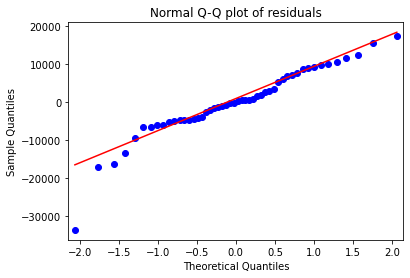

In [16]:
#Test for normality
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [17]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

Residual plot for homoscedasticity

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

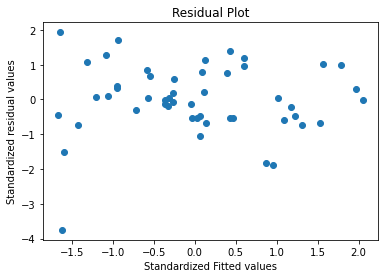

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

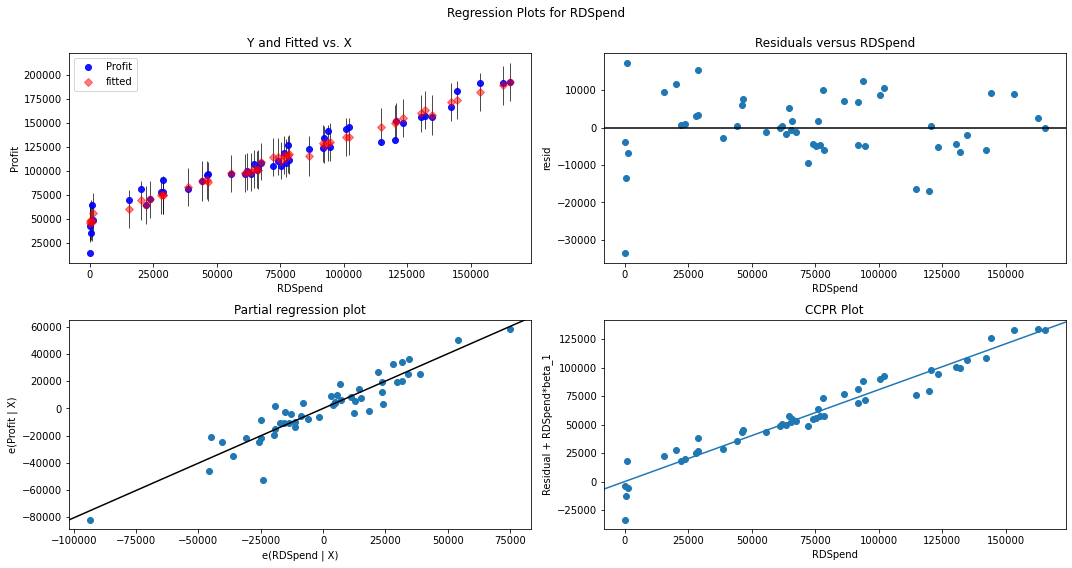

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

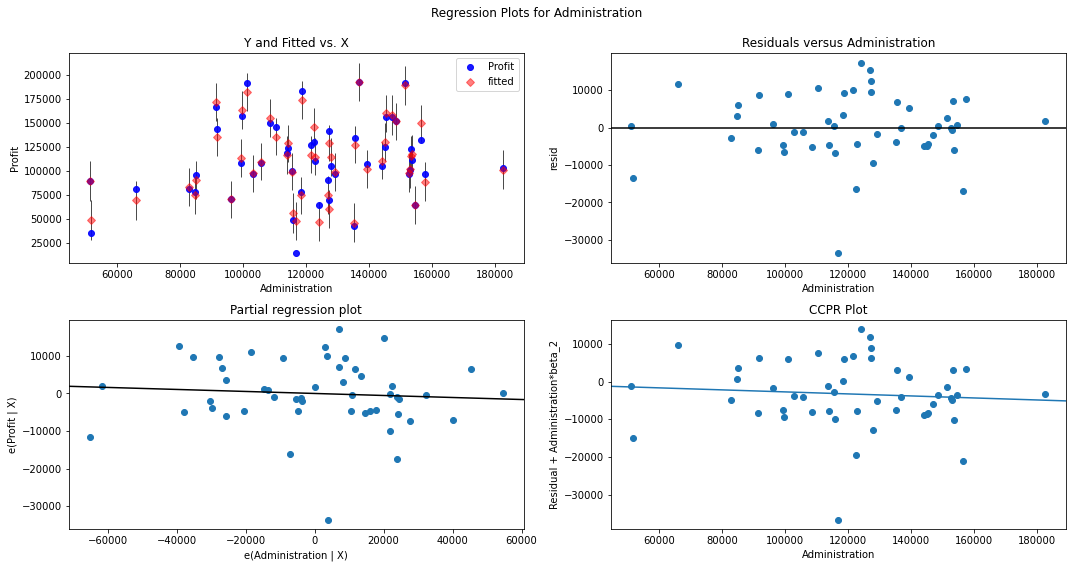

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

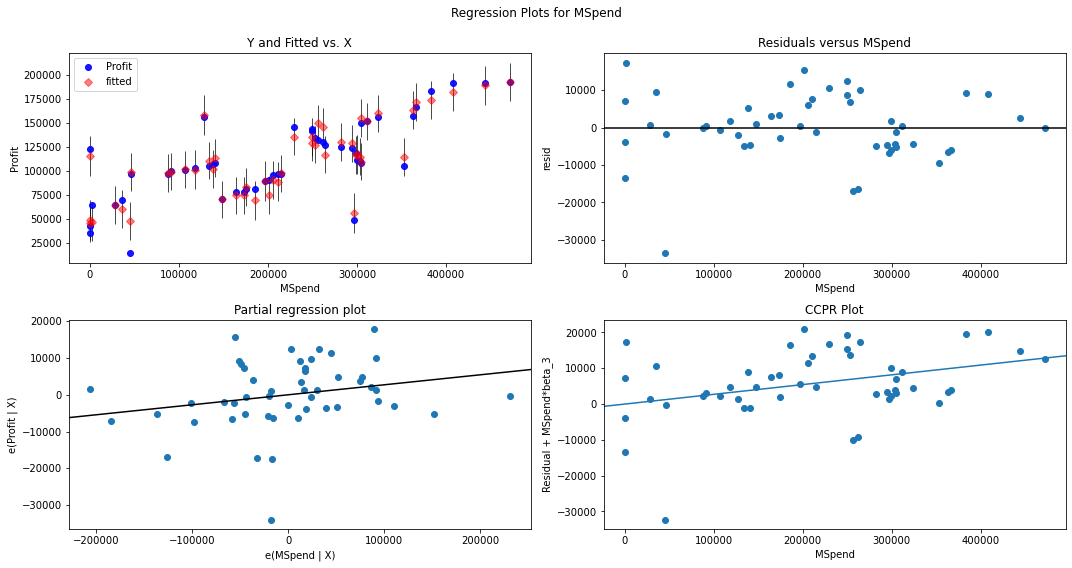

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MSpend", fig=fig)
plt.show()

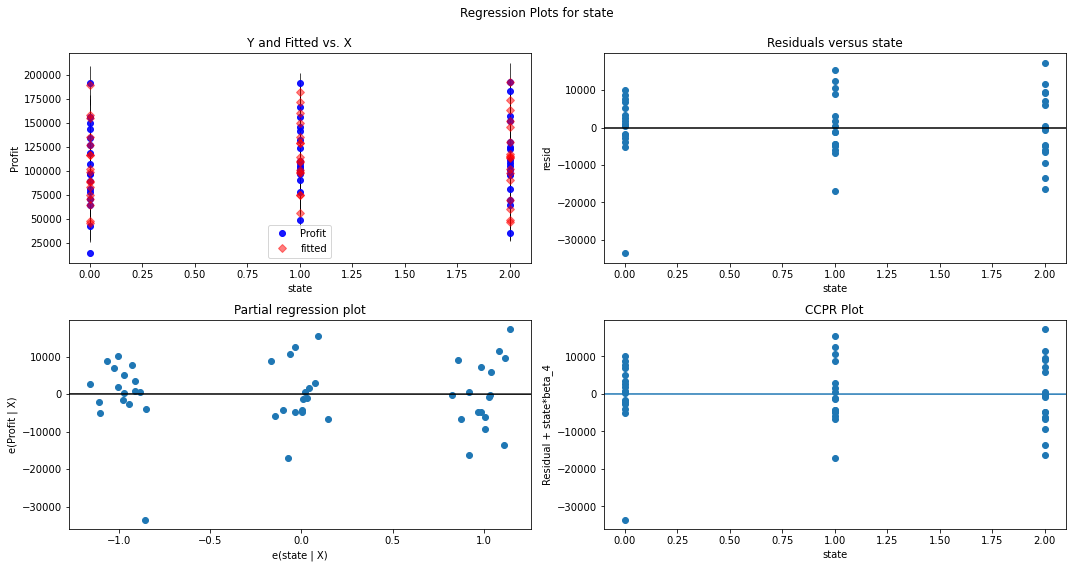

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "state", fig=fig)
plt.show()

# Model deletion

In [24]:
# Detecting outliers - Cooks Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

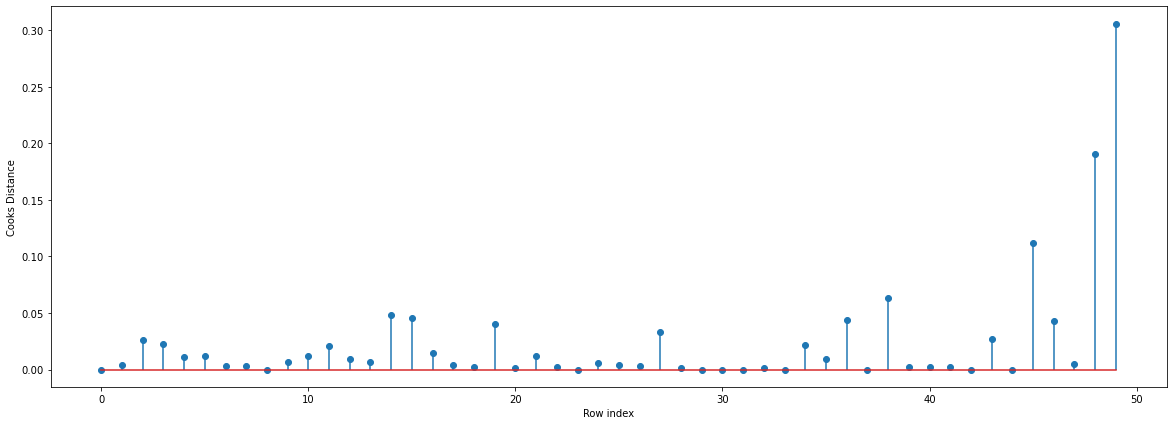

In [25]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

High Influence points

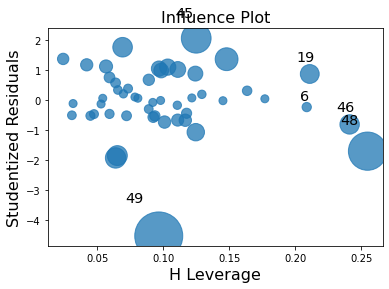

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [29]:
# Improving model
df[df.index.isin([49])]

,RDSpend,Administration,MSpend,Profit,state
49,0.0,116983.8,45173.06,14681.4,0


In [30]:
df1=df.drop(df.index[49],axis=0).reset_index()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           49 non-null     int64  
 1   RDSpend         49 non-null     float64
 2   Administration  49 non-null     float64
 3   MSpend          49 non-null     float64
 4   Profit          49 non-null     float64
 5   state           49 non-null     int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 2.2 KB


In [31]:
#Drop the original index
df1=df1.drop(['index'],axis=1)
df1.head()

,RDSpend,Administration,MSpend,Profit,state
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


Build Model

In [32]:
model1 = smf.ols('Profit~RDSpend+Administration+MSpend+state',data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.6
Date:                Fri, 21 May 2021   Prob (F-statistic):           1.45e-30
Time:                        12:52:49   Log-Likelihood:                -506.00
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.332e+04   5726.740      9.311      0.000    4.18e+04    6.49e+04
RDSpend            0.7844      0.039     20.367      0.000       0.707       0.862
Administration    -0.0225      0.043     -0.522      0.604      -0.109       0.064
MSpend             0.0252      0.014      1.811      0.077      -0.003       0.053
state           -969.6140   1360.800     -0.713      0.480   -3712.127    1772.899
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.215
Skew:                           0.042   Prob(JB):                        0.898
Kurtosis:                       2.686   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predecting New Data

In [33]:
price_pred = model1.predict()
price_pred

array([189868.78901219, 188621.97581781, 180696.38811719, 171596.04713412,
       170974.61385755, 161707.5928074 , 158810.08908803, 159428.38819656,
       150426.26054783, 155290.40058227, 135566.71747102, 136504.23749562,
       129396.80750753, 128785.61457802, 149362.83431154, 145038.63808935,
       118427.4841764 , 129473.53815203, 129168.66975187, 115710.75712796,
       118085.31608172, 116949.67363177, 115259.96261519, 110611.26295184,
       113115.64454503, 104372.31759877, 111565.77340485, 113950.77738281,
       103021.53547277, 102091.76000502, 100668.03777448,  98117.56970081,
       101307.65369161,  98960.72308059,  91490.91874408,  90731.33498849,
        77035.41340861,  91692.30252392,  70426.96804793,  86101.07944004,
        77554.67593335,  76461.72234574,  73423.22027538,  61570.12833941,
        67944.05785644,  49418.68242895,  58252.83083085,  50271.59056744,
        50641.78250983])

In [34]:
df1["PredProfit"] = price_pred
df1.head()

,RDSpend,Administration,MSpend,Profit,state,PredProfit
0,165349.20,136897.80,471784.10,192261.83,2,189868.789012
1,162597.70,151377.59,443898.53,191792.06,0,188621.975818
2,153441.51,101145.55,407934.54,191050.39,1,180696.388117
3,144372.41,118671.85,383199.62,182901.99,2,171596.047134
4,142107.34,91391.77,366168.42,166187.94,1,170974.613858


In [35]:
error = np.sqrt(np.mean((df1["Profit"]-df1["PredProfit"])**2))
error

7388.086949398373

In [36]:
# Variable : RDSpend,Administration,MSpend,State-SimpleLinear Regression model r^2
# Variable : model - Multiple linear regression R^2 before transformation
# Variable : model1 - Multiple linear regression R^2 after transformation
# Storing R^2 values in a data frame
d1 = {'Variables':['RDSpend','Administration','MSpend','state','model','model1'],'R^2':[ml_r.rsquared,ml_a.rsquared,ml_m.rsquared,ml_s.rsquared,model.rsquared,model1.rsquared]}
r2_frame = pd.DataFrame(d1)  
r2_frame

,Variables,R^2
0,RDSpend,0.946535
1,Administration,0.040287
2,MSpend,0.559154
3,state,0.010362
4,model,0.950746
5,model1,0.961758


# Linear regression using scikit-learn model

In [37]:
from sklearn.linear_model import LinearRegression

In [46]:
dfs = df1.drop(['PredProfit'],axis=1)

In [48]:
x = dfs.drop(['Profit'],axis=1) 
y = dfs['Profit']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=1/3,random_state=0)

In [62]:
reg = LinearRegression().fit(x_train,y_train)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [65]:
# Accuracy - R^2
reg.score(x, y, sample_weight=None) 

0.950458925653082

In [55]:
ypred = reg.predict(x_train)
ypred

array([187115.69910506, 131354.92568361,  68167.49793504, 117712.02567885,
       156275.98739602, 112368.86480664,  80051.03045415, 124648.27613394,
       121919.47131429, 152043.10933406,  82805.74023034,  56009.68054891,
       176799.21604965, 195861.07186719,  49301.15751796,  67525.09594429])

In [57]:
err = np.sqrt(np.mean((y_train-ypred)**2))
err

6649.01923136504